<a href="https://colab.research.google.com/github/nabilaaaa24/data_mining/blob/main/Praktikum_Modul_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Load Dataset

In [1]:
# Import libraries yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer

In [2]:
# Muat dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/credit_data.csv')

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#2. Preprocessing Data

##Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
missing_values = df.isnull().sum()
print("\nJumlah nilai kosong atau NaN untuk setiap fitur:")
print(missing_values)


Jumlah nilai kosong atau NaN untuk setiap fitur:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [19]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

# DataFrame setelah data cleaning
print(df.head())

df.to_csv('credit_data_clean.csv', index=False)

  CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001  0.002148           0.818182   0.001945          0.000000   
1  C10002  0.168169           0.909091   0.000000          0.000000   
2  C10003  0.131026           1.000000   0.015766          0.018968   
3  C10004  0.087521           0.636364   0.030567          0.036775   
4  C10005  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                         

##Normalisasi Data

In [7]:
scaler = MinMaxScaler()

# Fitur-fitur yang akan dinormalisasi
features_to_normalize = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
                         'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                         'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

# Normalisasi fitur-fitur tertentu
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

In [8]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,0.031720,0.003979,0.001826,0.000000,12
1,C10002,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.250000,4,0,0.232053,0.080893,0.014034,0.222222,12
2,C10003,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,0.248748,0.012264,0.008210,0.000000,12
3,C10004,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.083333,1,1,0.248748,0.000000,0.011310,0.000000,12
4,C10005,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,0.038397,0.013374,0.003204,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,0.031720,0.006419,0.000640,0.500000,6
8946,C19187,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,0.031720,0.005439,0.011310,0.000000,6
8947,C19188,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,0.031720,0.001602,0.001078,0.250000,6
8948,C19189,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.166667,2,0,0.015025,0.001036,0.000729,0.250000,6


#3. Penentuan Jumlah Cluster, gunakan metode Elbow untuk menentukan jumlah cluster yang optimal. Plot grafik WCSS (Within-Cluster Sum of Square) terhadap jumlah kluster dan temukan titik 'siku' sebagai jumlah cluster yang ideal.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

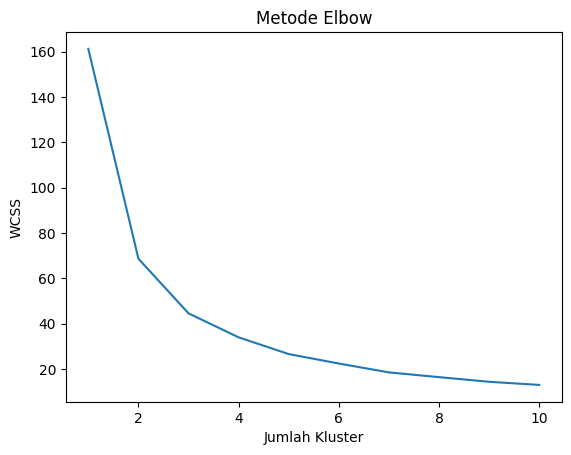

In [9]:
# Gunakan metode Elbow untuk menentukan jumlah kluster yang ideal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['CREDIT_LIMIT', 'PAYMENTS']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Kluster')
plt.ylabel('WCSS')
plt.show()

Jumlah cluster yang sesuai adalah 4. Hal ini dapat dilihat dari kurva WCSS (Within Cluster Sum of Squares) yang menunjukkan perubahan signifikan pada rentang cluster 1 hingga 4.

Pada rentang cluster 1 hingga 4, kurva WCSS menurun tajam dan kemudian mulai mendatar. Hal ini menunjukkan bahwa penambahan cluster baru pada rentang tersebut tidak memberikan peningkatan yang signifikan dalam pengelompokan data.

#4. Penerapan K-Means Clustering

In [14]:
# Melakukan clustering dengan jumlah kluster yang telah ditentukan
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans.fit(df[['CREDIT_LIMIT', 'PAYMENTS']])

# Menambahkan kolom kluster ke dalam DataFrame
df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#5. Analisis dan Visualisasi Hasil Clustering, gunakan visualisasi seperti scatter plot atau bar chart untuk menampilkan distribusi fitur penting di setiap kluster.

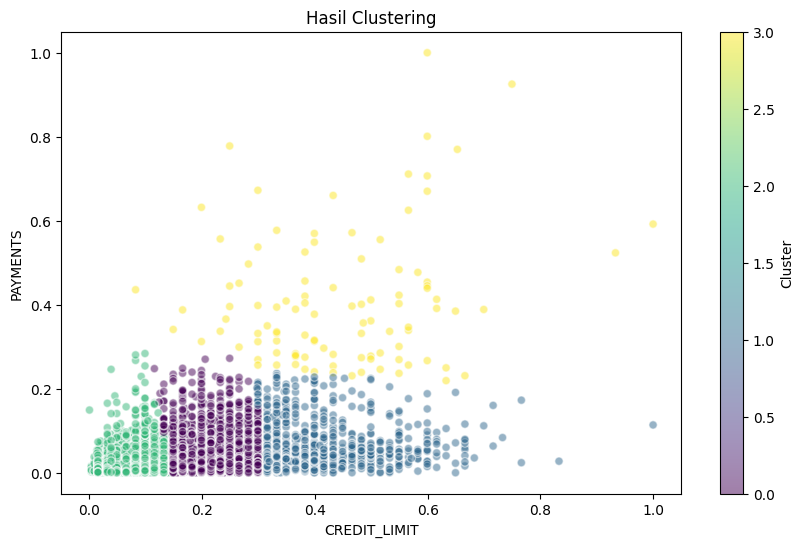

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CREDIT_LIMIT'], df['PAYMENTS'],
            c=df['Cluster'], cmap='viridis', alpha=0.5, edgecolors='w')
plt.title('Hasil Clustering')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PAYMENTS')
plt.colorbar(label='Cluster')
plt.show()

<ipython-input-16-79f172599077>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Cluster', y='CREDIT_LIMIT', estimator=sum, ci=None, palette='viridis')
<ipython-input-16-79f172599077>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y='CREDIT_LIMIT', estimator=sum, ci=None, palette='viridis')


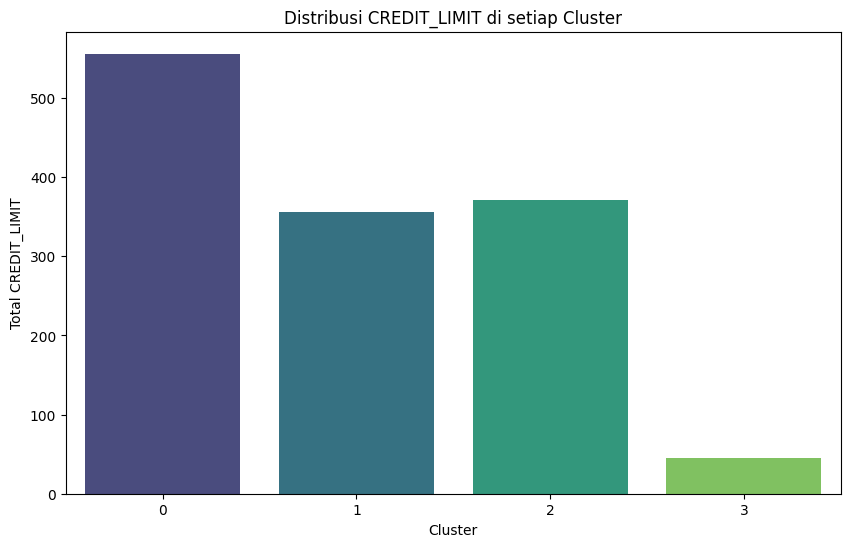

In [16]:
# Visualisasi bar chart untuk distribusi 'CREDIT_LIMIT' di setiap kluster
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Cluster', y='CREDIT_LIMIT', estimator=sum, ci=None, palette='viridis')
plt.title('Distribusi CREDIT_LIMIT di setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total CREDIT_LIMIT')
plt.show()

<ipython-input-17-6c45631b7e9c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Cluster', y='PAYMENTS', estimator=sum, ci=None, palette='viridis')
<ipython-input-17-6c45631b7e9c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y='PAYMENTS', estimator=sum, ci=None, palette='viridis')


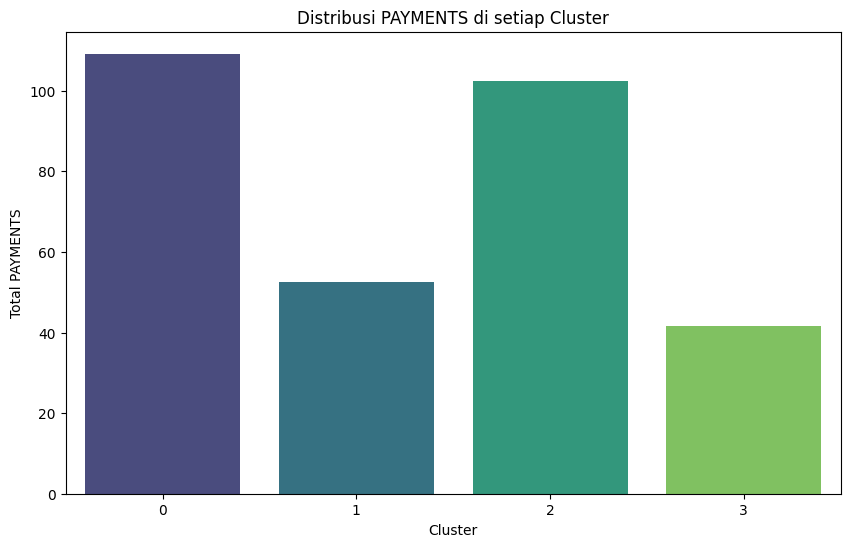

In [17]:
# Visualisasi bar chart untuk distribusi 'CREDIT_LIMIT' di setiap kluster
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Cluster', y='PAYMENTS', estimator=sum, ci=None, palette='viridis')
plt.title('Distribusi PAYMENTS di setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total PAYMENTS')
plt.show()

#6. Interpretasi Kluster, buatlah interpretasi untuk setiap cluster berdasarkan karakteristik yang paling menonjol.

1. Cluster 0


*   Memiliki Credit Limit tertinggi. Kemungkinan besar klaster ini mewakili nasabah dengan profil risiko yang sangat rendah. Nasabah dalam klaster ini mungkin memiliki riwayat kredit yang sangat baik, penghasilan yang sangat tinggi, dan pekerjaan yang mapan.
*   Memiliki jumlah pembayaran tertinggi. Kemungkinan besar klaster ini mewakili nasabah dengan tingkat pembayaran yang sangat baik. Nasabah dalam klaster ini mungkin memiliki penghasilan yang sangat tinggi dan mampu memenuhi kewajiban keuangan dengan sangat baik.


2. Cluster 1


*   Memiliki Credit Limit tertinggi, dengan nilai antara 300-400, namun tidak mencapai nilai sebesar cluster 2. Kemungkinan besar klaster ini mewakili nasabah dengan profil risiko yang sangat rendah. Nasabah dalam klaster ini mungkin memiliki riwayat kredit yang baik, penghasilan yang tinggi, dan pekerjaan yang mapan.
*   Memiliki jumlah pembayaran 40-60 (mendekati 50). Kemungkinan besar klaster ini mewakili nasabah dengan tingkat pembayaran yang moderat. Nasabah dalam klaster ini mungkin memiliki penghasilan yang stabil dan mampu memenuhi kewajiban keuangan, namun mereka mungkin tidak memiliki potensi pembayaran yang tinggi seperti nasabah di klaster lainnya.

3. Cluster 2


*   Memiliki Credit Limit tertinggi kedua, dengan nilai di antara 300-400. Kemungkinan cluster ini memiliki riwayat kredit yang baik dan penghasilan yang lumayan stabil, dan memiliki potensi kredit yang cukup tinggi.
*   Memiliki jumlah pembayaran tertinggi kedua, dengan nilai di atas 100. Kemungkinan besar klaster ini mewakili nasabah dengan tingkat pembayaran yang sangat baik. Nasabah dalam klaster ini mungkin memiliki penghasilan yang sangat tinggi dan mampu memenuhi kewajiban keuangan dengan sangat baik.

4. Cluster 3


*   Memiliki Credit Limit terendah, dengan nilai maksimum di bawah 50. Kemungkinan besar klaster ini mewakili nasabah dengan risiko kredit tinggi. Hal ini dapat disebabkan oleh berbagai faktor, seperti riwayat kredit yang buruk, penghasilan yang rendah, atau pekerjaan yang tidak stabil.
*   Memiliki jumlah pembayaran terendah, dengan nilai maksimum 40. Kemungkinan besar klaster ini mewakili nasabah dengan tingkat pembayaran yang rendah. Hal ini dapat disebabkan oleh berbagai faktor, seperti penghasilan yang rendah, pekerjaan yang tidak stabil, atau ketidakmampuan untuk memenuhi kewajiban keuangan.


